In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("Dataset .csv")

In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


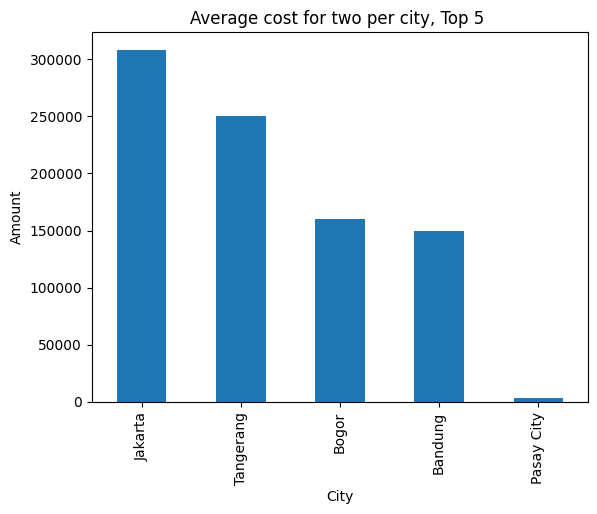

In [7]:
data.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Average cost for two per city, Top 5 ')
plt.xlabel('City')
plt.ylabel('Amount')
plt.show()

In [8]:
cv = data.groupby('Cuisines')['Votes'].sum().reset_index()

In [9]:
cv = cv[cv['Votes']!=0]

In [10]:
cv

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


In [11]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

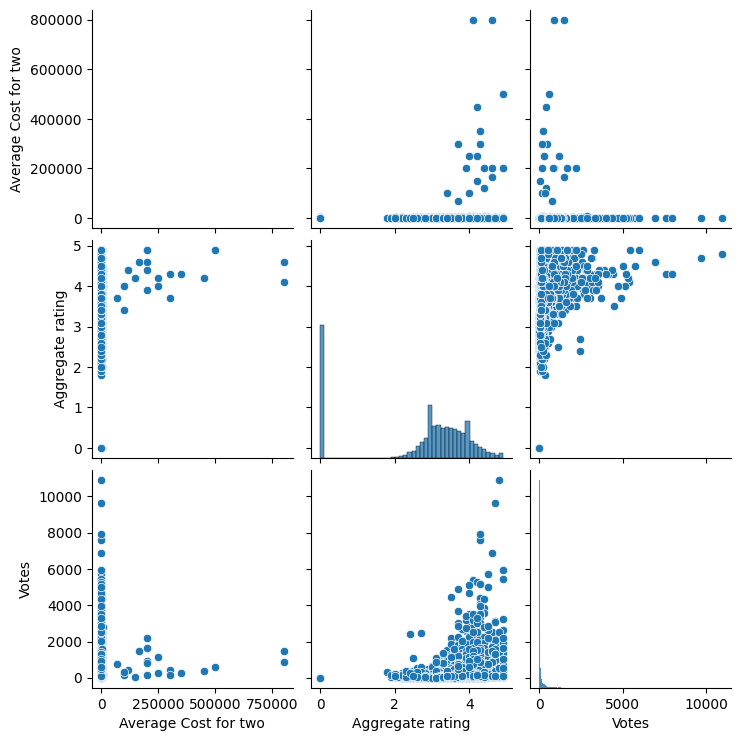

In [12]:
sns.pairplot(data[['Average Cost for two', 'Aggregate rating', 'Votes']])

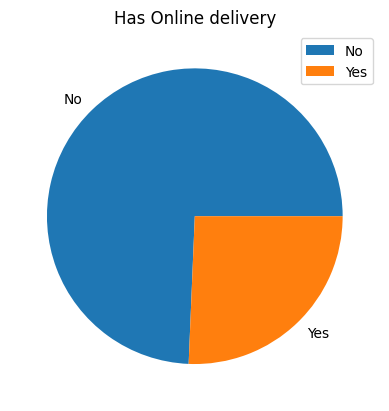

In [13]:
data['Has Online delivery'].value_counts().plot(kind='pie')
plt.title("Has Online delivery")
plt.ylabel("")
plt.legend()
plt.show()

In [14]:
data[['Aggregate rating', 'Rating text']].sort_values(by='Aggregate rating', ascending=True)

,Aggregate rating,Rating text
6615,0.0,Not rated
1994,0.0,Not rated
1995,0.0,Not rated
1996,0.0,Not rated
1997,0.0,Not rated
...,...,...
9514,4.9,Excellent
39,4.9,Excellent
324,4.9,Excellent
580,4.9,Excellent


In [15]:
data = data[data['Rating text'] !='Not rated']

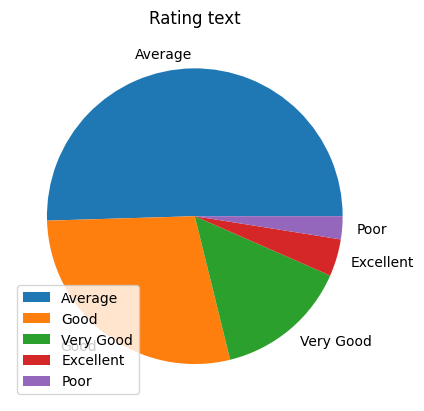

In [16]:
data['Rating text'].value_counts().plot(kind='pie')
plt.title('Rating text')
plt.legend()
plt.ylabel('')
plt.show()

In [17]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [18]:
X = data[['Average Cost for two', 'Has Table booking','Has Online delivery','Price range']]

In [19]:
y = data[['Aggregate rating']]

In [20]:
# Above 2 below  2.5 ... Poor
# Above 2.5 below  3.5 ... Average
# Above 3.5 below  4.0 ... Good
# Above 4.0 below  4.5 ... Very Good
# Above 4.5 ... Excellent

In [21]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4
3,1500,No,No,4
4,1500,Yes,No,4
...,...,...,...,...
9546,80,No,No,3
9547,105,No,No,3
9548,170,No,No,4
9549,120,No,No,4


In [22]:

from sklearn import preprocessing

In [23]:
labelencoder = preprocessing.LabelEncoder()

In [24]:
X['Has Table booking'] = labelencoder.fit_transform(X['Has Table booking'])

C:\Users\ALBERT\AppData\Local\Temp\ipykernel_12688\4074334702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Has Table booking'] = labelencoder.fit_transform(X['Has Table booking'])


In [25]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,No,3
1,1200,1,No,3
2,4000,1,No,4
3,1500,0,No,4
4,1500,1,No,4
...,...,...,...,...
9546,80,0,No,3
9547,105,0,No,3
9548,170,0,No,4
9549,120,0,No,4


In [26]:
X['Has Online delivery'] = labelencoder.fit_transform(X['Has Online delivery']) 
 

C:\Users\ALBERT\AppData\Local\Temp\ipykernel_12688\1533828965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Has Online delivery'] = labelencoder.fit_transform(X['Has Online delivery'])


In [27]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,0,3
1,1200,1,0,3
2,4000,1,0,4
3,1500,0,0,4
4,1500,1,0,4
...,...,...,...,...
9546,80,0,0,3
9547,105,0,0,3
9548,170,0,0,4
9549,120,0,0,4


In [28]:
labelencoder.classes_[1]

'Yes'

In [29]:
# Has Table booking, 0 is No, 1 is Yes
# Has Online delivery, 0 is No, 1 is Yes

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
X = scaler.fit_transform(X)

In [32]:
X

array([[-0.0190367 ,  2.37978283, -0.68302371,  1.10671644],
       [-0.0135729 ,  2.37978283, -0.68302371,  1.10671644],
       [ 0.13941344,  2.37978283, -0.68302371,  2.18135204],
       ...,
       [-0.06985002, -0.42020641, -0.68302371,  2.18135204],
       [-0.07258191, -0.42020641, -0.68302371,  2.18135204],
       [-0.07613338, -0.42020641, -0.68302371,  0.03208084]])

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [35]:
def modelresult (prediction):
    print('Mean absolute error on the model is {}'.format(mean_absolute_error(y_test, prediction)))
    print('Root mean squared error on the model is {}'.format(np.sqrt(mean_squared_error(y_test, prediction))))


In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [37]:
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
predictionsfromlr = lr.predict(X_test)

In [39]:
modelresult(predictionsfromlr)

Mean absolute error on the model is 0.4018182483702115
Root mean squared error on the model is 0.5023746595419246


In [40]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [41]:
svrmodel =SVR()

In [42]:
param_grid = {'C':[0.1, 0.5], 'kernel':['linear', 'rbf', 'poly'], 'degree':[2]}

In [43]:
grid_svr = GridSearchCV(svrmodel, param_grid)

In [44]:
grid_svr.fit(X_train, y_train)

d:\streamlit_app\streamlit_app\st_venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\streamlit_app\streamlit_app\st_venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\streamlit_app\streamlit_app\st_venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\streamlit_app\streamlit_app\st_venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array w

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2],
                         'kernel': ['linear', 'rbf', 'poly']})

In [50]:
predictionsfromsvr = grid_svr.predict(X_test)

In [52]:
modelresult(predictionsfromsvr)

Mean absolute error on the model is 0.3868474511055714
Root mean squared error on the model is 0.49444823545507194


In [65]:
from sklearn.tree import DecisionTreeRegressor

treemodel = DecisionTreeRegressor()

In [67]:
param_grid2 = {
    'max_depth':[10, 30],
    'min_samples_leaf':[1,2],
    'min_samples_split':[2,5]
}

In [71]:
grid_tree = GridSearchCV(estimator=treemodel, param_grid=param_grid2)

In [72]:
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [74]:
predictionsfromtreemodel = grid_tree.predict(X_test)

In [75]:
modelresult(predictionsfromtreemodel)

Mean absolute error on the model is 0.3632705616051856
Root mean squared error on the model is 0.4622487660381069


In [78]:
from sklearn.ensemble import RandomForestRegressor

rfrmodel = RandomForestRegressor()

In [77]:
param_grid3 = {
    'max_depth':[5, 15],
    'n_estimators':[2,5,10]
}

In [79]:
grid_rfr = GridSearchCV(rfrmodel, param_grid3)

In [80]:
grid_rfr.fit(X_train, y_train)

d:\streamlit_app\streamlit_app\st_venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\streamlit_app\streamlit_app\st_venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\streamlit_app\streamlit_app\st_venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\streamlit_app\streamlit_app\st_venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was exp

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [82]:
predictionsfromrfr= grid_rfr.predict(X_test)

In [83]:
modelresult(predictionsfromrfr)

Mean absolute error on the model is 0.3602234259731772
Root mean squared error on the model is 0.458480490094236


In [100]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
param_grid4 = {'n_neighbors':[12, 14,15,18, 20, 24, 26]}
knn_grid = GridSearchCV(knn, param_grid4)

In [101]:
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [12, 14, 15, 18, 20, 24, 26]})

In [102]:
knn_predict =  knn_grid.predict(X_test)

In [103]:
modelresult(knn_predict)

Mean absolute error on the model is 0.364291279281151
Root mean squared error on the model is 0.46263791120547115


In [104]:
knn_grid.best_params_

{'n_neighbors': 26}

In [105]:
from sklearn.ensemble import  AdaBoostRegressor
ada = AdaBoostRegressor()
param_grid5 = {
    'n_estimators':[50, 100, 200],
    'learning_rate':[0.01, 0.5, 1]
}

ada_grid = GridSearchCV(ada, param_grid5)

In [106]:
ada_grid.fit(X_train, y_train)

d:\streamlit_app\streamlit_app\st_venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\streamlit_app\streamlit_app\st_venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\streamlit_app\streamlit_app\st_venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\streamlit_app\streamlit_app\st_venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array w

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.5, 1],
                         'n_estimators': [50, 100, 200]})

In [108]:
prediction_ada = ada_grid.predict(X_test)

In [109]:
modelresult(prediction_ada)

Mean absolute error on the model is 0.3686528700923619
Root mean squared error on the model is 0.4684314843480076


In [110]:
grid_rfr

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [111]:
import joblib
joblib.dump(grid_rfr, 'mlmodel.pkl')

['mlmodel.pkl']

In [112]:
scaler

StandardScaler()

In [113]:
joblib.dump(scaler, 'scaler2.pkl')

['scaler2.pkl']